# 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 用 SVM 來做分類

#### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

In [2]:
x = np.array([[-3,2], [-6,5], [3,-4], [2,-8]])
y = np.array([1, 1, 2, 2])

我們要畫圖時, 需要把 $x$ 中點的 $x$-座標, $y$-座標分成兩個 list (array)。記得我們要 $x$ 全部是這樣叫出來的。

而 $x$ 中前面的元素 ($x$-座標) 是這樣。當然 $y$-座標也是類似方法叫出來。

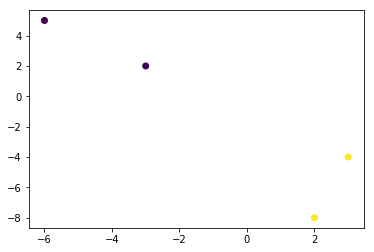

In [6]:
plt.scatter([-3, -6, 3, 2], [2, 5, -4, -8], c=y)

In [7]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [8]:
x[2, 1]

-4

In [9]:
x[:,0]

array([-3, -6,  3,  2])

In [10]:
x[:,1]

array([ 2,  5, -4, -8])

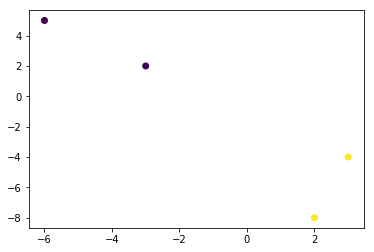

In [11]:
plt.scatter(x[:,0], x[:,1], c=y)

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

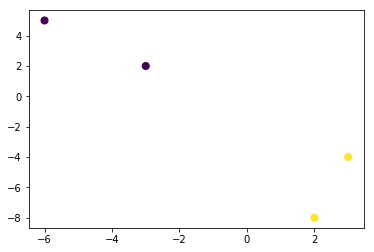

In [12]:
plt.scatter(x[:,0], x[:,1], s=50, c=y)

In [13]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [14]:
y

array([1, 1, 2, 2])

### SVM 支持向量機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

打開一台機器 (這以後我們常常會做類似的動作)。

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC()

學習! 這樣就做完了!!

In [17]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 預測結果

先來看看我們之前用來學的有沒有做對。

In [18]:
clf.predict([[-3,2]])

array([1])

In [19]:
clf.predict(x)

array([1, 1, 2, 2])

In [20]:
clf.predict([[2.5,3]])

array([1])

再來視覺化一下我們的成果。

#### meshgrid

In [49]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [51]:
X, Y = np.meshgrid(xx,yy)

In [53]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [54]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

![meshgrid](meshgrid2.jpg)

In [55]:
X, Y = np.meshgrid(np.linspace(-6,3,30), np.linspace(-8,5,30))

#### ravel 拉平法

In [59]:
X = X.ravel()
Y = Y.ravel()

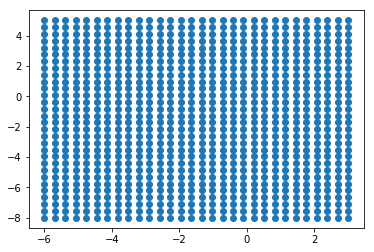

In [60]:
plt.scatter(X, Y)

#### zip 高級組合法

In [61]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [62]:
list(zip(xx,yy))

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [65]:
Z = clf.predict(list(zip(X,Y)))

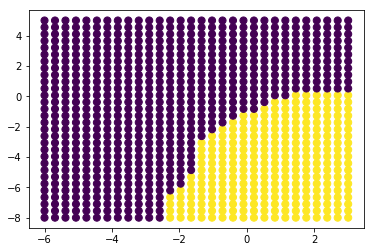

In [67]:
plt.scatter(X, Y, s=50, c=Z)